In [1]:
import numpy as np
import pandas as pd # Read, Series, DataFrame, Manipulation, Plotting 

import matplotlib # Plotting, Customization, Subplots, Diagram, Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn')

In [3]:
## Load Dataset

In [4]:
df_airbnb = pd.read_csv('./AB_NYC_2019.csv')
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
## Check Data info

In [6]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], format='%Y-%m-%d')
last_review = df_airbnb.loc[df_airbnb['last_review'] > '2019-07-01']

last_review.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188
51,14287,Cozy 1BD on Central Park West in New York City,56094,Joya,Manhattan,Upper West Side,40.78635,-73.97008,Entire home/apt,151,2,73,2019-07-07,0.63,1,302


In [9]:
print('Total review:', len(last_review))

Total review: 3366


In [10]:
## Check Null Values

In [11]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
## Drop Columns

In [13]:
df_airbnb = df_airbnb.drop(['id', 'name', 'host_id', 'host_name'], axis=1)

In [14]:
df_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
## Fill Missing value in last_review

In [16]:
df_airbnb['last_review'] = df_airbnb['last_review'].fillna(df_airbnb['last_review'].mode()[0])

In [17]:
df_airbnb[['last_review']].isnull().sum()

last_review    0
dtype: int64

In [18]:
## Fill Missing value in review_per_month

In [19]:
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(df_airbnb['reviews_per_month'].mean())

In [20]:
df_airbnb.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
## Check Column Price

In [22]:
df_airbnb.sort_values(by=['price'], ascending=False)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.040000,1,0
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.160000,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2019-06-23,1.373221,1,83
40433,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-06-23,1.373221,1,365
12342,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.140000,1,83
...,...,...,...,...,...,...,...,...,...,...,...,...
25778,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.150000,1,73
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.350000,6,222
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.560000,4,127
26841,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.110000,6,333


In [23]:
price = df_airbnb['price']
print(f'Minimum price is {price.min()} and maximum price is {price.max()}')

Minimum price is 0 and maximum price is 10000


In [24]:
df_airbnb.groupby('neighbourhood_group')['price'].agg(['mean','median','sum'])

,mean,median,sum
neighbourhood_group,,,
Bronx,87.496792,65.0,95459
Brooklyn,124.383207,90.0,2500600
Manhattan,196.875814,150.0,4264527
Queens,99.517649,75.0,563867
Staten Island,114.812332,75.0,42825


In [25]:
## Create Column Price Category

In [26]:
df_airbnb['price_category'] = np.where(df_airbnb['price'] < 50, 'cheap', np.where(df_airbnb['price'] < 100, 'Medium','Expensive'))

In [27]:
df_airbnb['price_category'].unique()

array(['Expensive', 'Medium', 'cheap'], dtype=object)

In [28]:
df_airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Expensive
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Expensive
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium


In [29]:
## Visualize Everything

In [30]:
df_Brooklyn = df_airbnb[['neighbourhood_group', 'neighbourhood']].loc[df_airbnb['neighbourhood_group'] == 'Brooklyn']

In [31]:
df_Brooklyn.head()

,neighbourhood_group,neighbourhood
0,Brooklyn,Kensington
3,Brooklyn,Clinton Hill
6,Brooklyn,Bedford-Stuyvesant
12,Brooklyn,South Slope
15,Brooklyn,Williamsburg


In [32]:
neighbourhood = []
total = []

neighbourhood_dict_ = df_Brooklyn.value_counts().to_dict()

for key in neighbourhood_dict_:
    neighbourhood.append(key[1]), total.append(neighbourhood_dict_[key])
    
print('total neighbourhood:', len(neighbourhood))

total neighbourhood: 47


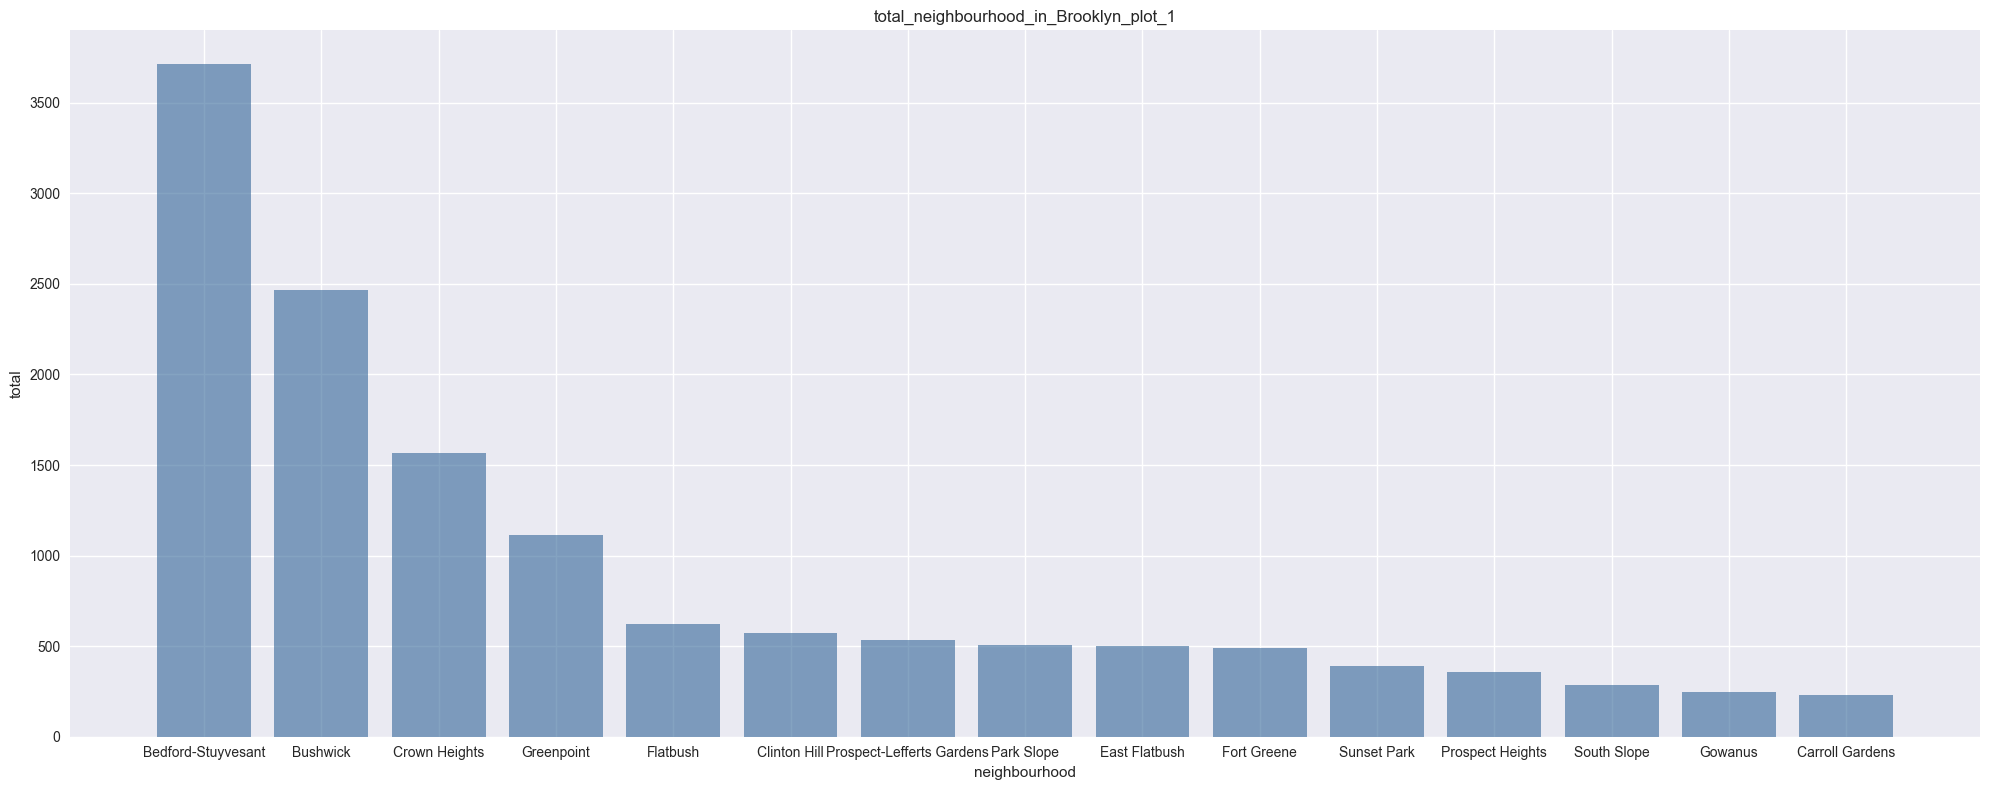

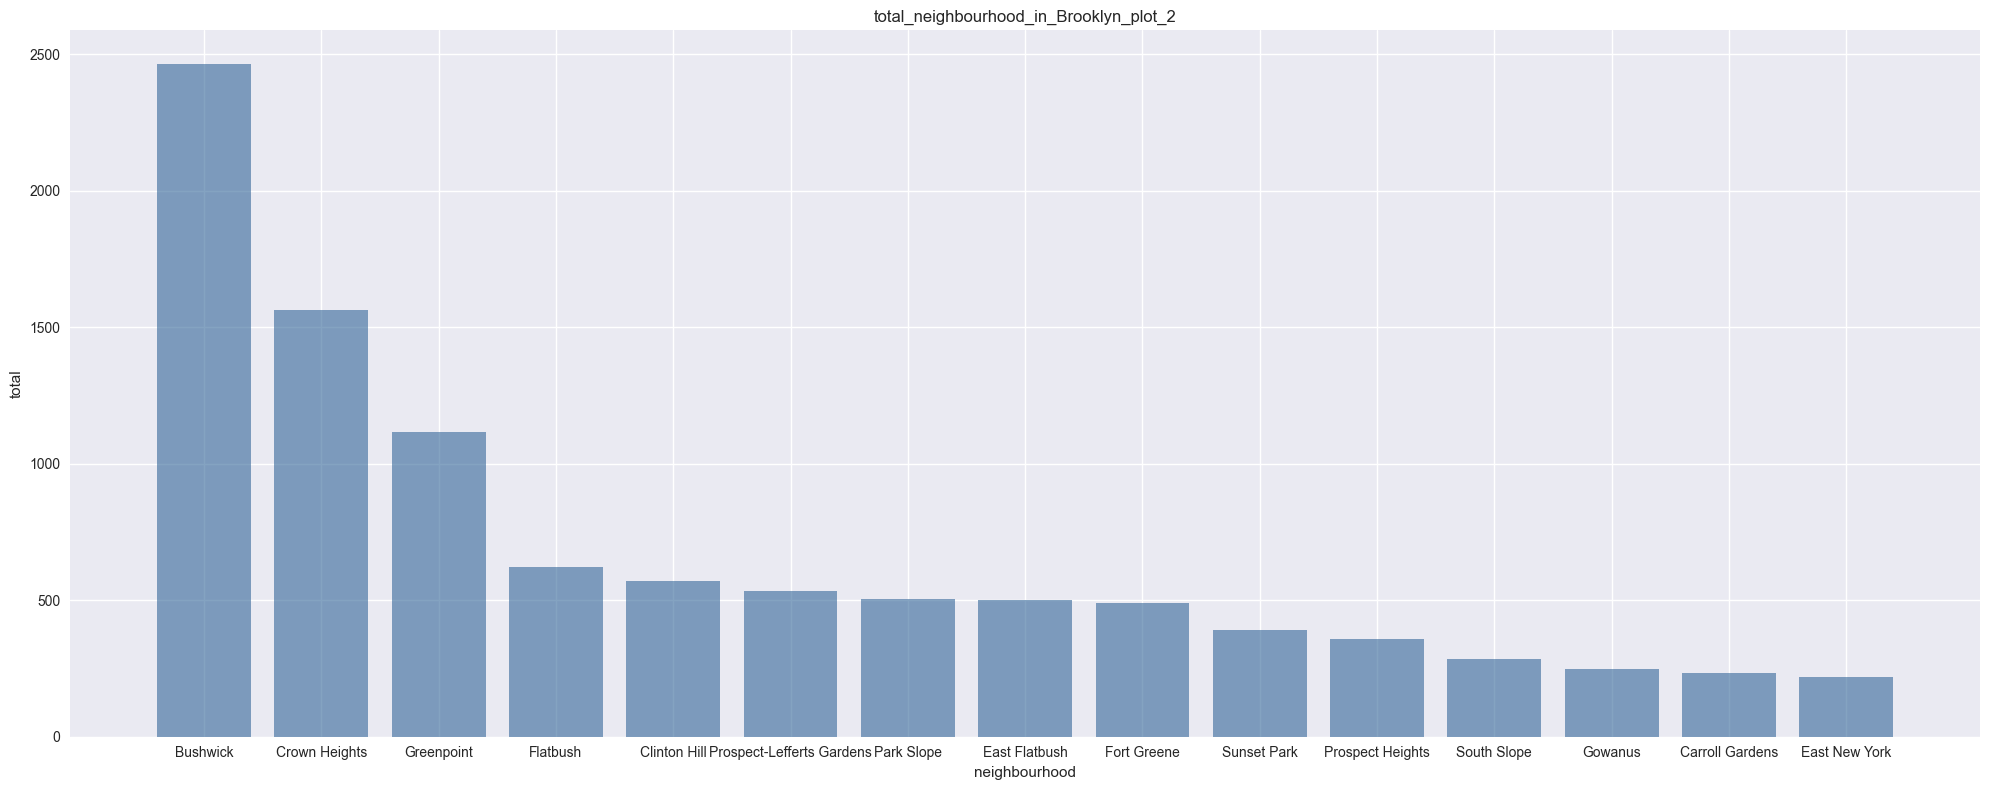

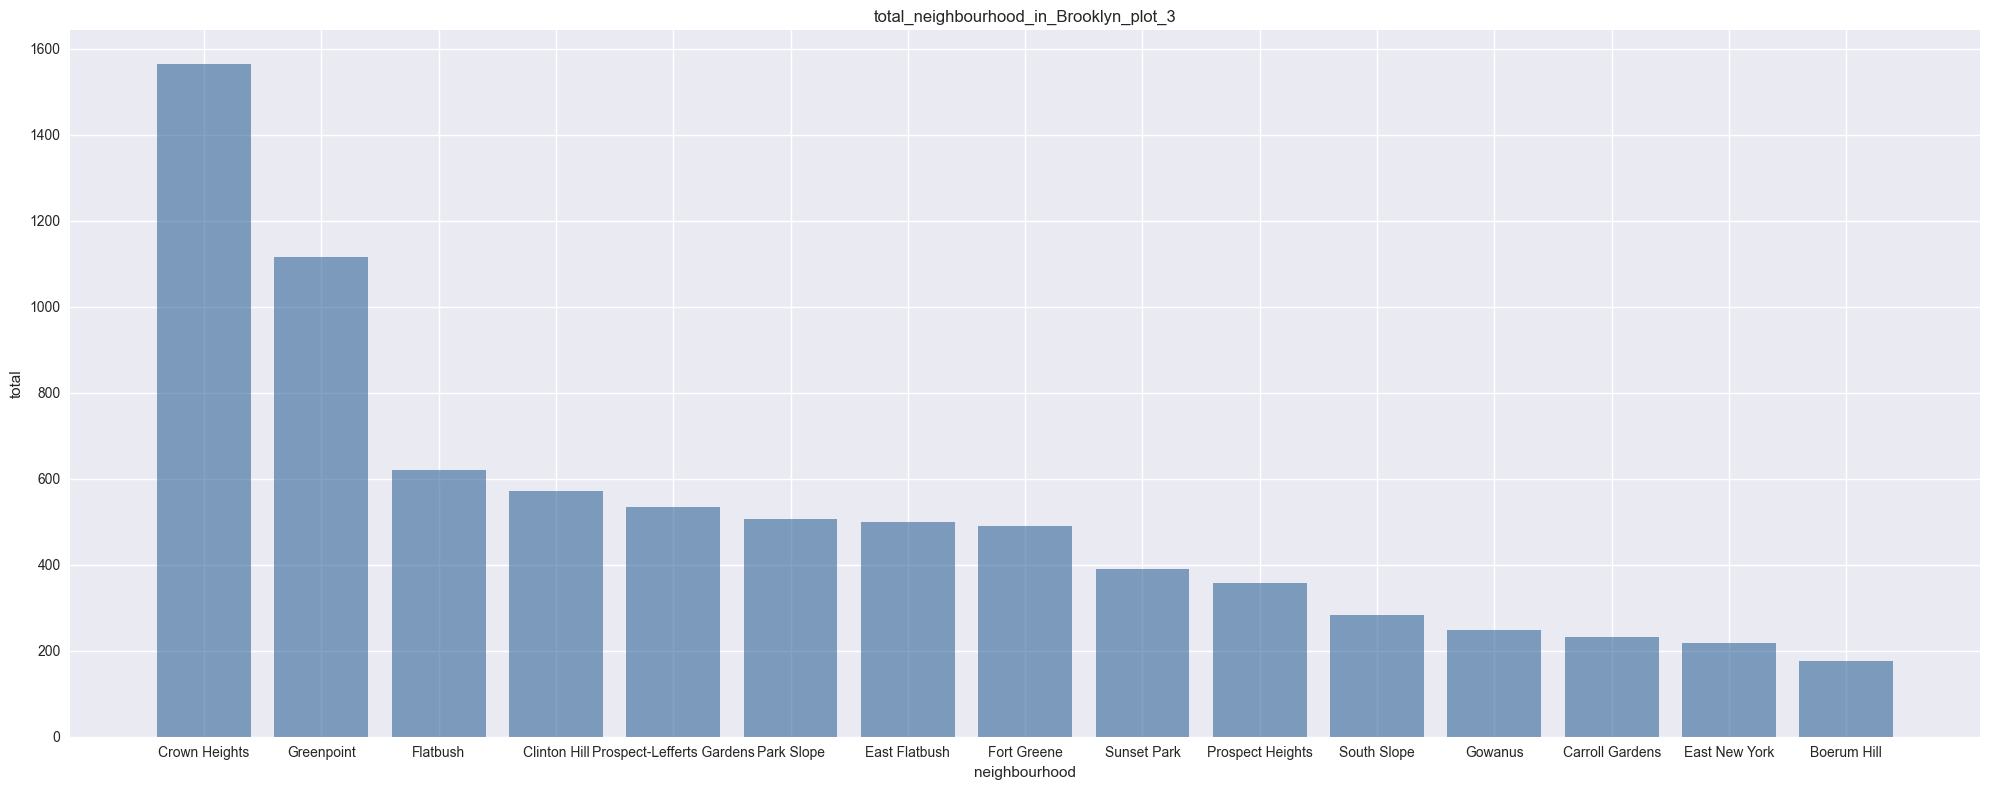

In [33]:
num_in_plot = 15

for i in range(1, (len(neighbourhood)//num_in_plot)+1):
    
    plt.figure(figsize=(20,8))
    
    if i is not 30:
        plt.bar(neighbourhood[i:i+num_in_plot], total[i:i+num_in_plot], color=(0.2,0.4,0.6,0.6))
    else:
        plt.bar(neighbourhood[i:], total[i:], color=(0.2,0.4,0.6,0.6))
        
    plt.title(f'total_neighbourhood_in_Brooklyn_plot_{i}')
    plt.xlabel('neighbourhood')
    plt.ylabel('total')
    plt.tight_layout()
    
    plt.savefig(f'./images/Total_Neighbourhood_in_Brooklyn_Plot_{i}.png')
    plt.show()

In [ ]:
print('Maxiumum review:', df_airbnb['number_of_reviews'].max())

plt.scatter(df_airbnb['price'], df_airbnb['number_of_reviews'], color='red') 
plt.xlabel('price') 
plt.ylabel('Num of reviews')

plt.savefig(f'./images/Relation_price_number_of_reviews.png') 
plt.show()

Maxiumum review: 629


In [ ]:
df_airbnb['is_availability'] = np.where(df_airbnb['availability_365'] == 0, 'No', 'Yes')
df_airbnb['is_availability'].value_counts()

In [ ]:
plt.pie(df_airbnb['is_availability'].value_counts().tolist(), labels=['Yes', 'No'], autopct='%1.1f%%')

plt.title("availability")
plt.tight_layout()

plt.savefig(f'./images/Availabilty_Pie_chart.png')

In [ ]:
df_airbnb["room_type"].value_counts()

In [ ]:
## Visualize Price

In [ ]:
price = df_airbnb['price']
bins = [25,50,75,100,125,150,175,200]

plt.hist(price, bins=bins, edgecolor='y')

plt.savefig(f'./images/Price_histogram.png')
plt.show()

In [ ]:
price_category = df_airbnb['price_category'].value_counts()
price_category = pd.DataFrame(price_category)
price_category.reset_index(inplace=True)
price_category

In [ ]:
price_category.columns = ['category', 'total']

category = price_category['category']
total = price_category['total']

In [ ]:
plt.bar(category, total, color=(0.2,0.2,0.6,0.6))

plt.title("price category")
plt.xlabel("category")
plt.ylabel("total")

plt.tight_layout()

plt.savefig(f'./images/Price_category_bar_chart.png')
plt.show()

In [ ]:
plt.pie(total, labels=list(price_category['category']), explode=[0,0,0.1], autopct='%1.1f%%')

plt.title("Price Category")
plt.tight_layout

plt.savefig(f'./images/Price_Category_Pie_Chart.png')
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(category, total)

plt.title("price category")
plt.xlabel("category")
plt.ylabel("total")

plt.subplot(1, 2, 2)
plt.pie(total, labels=list(price_category['category']), explode=[0,0,0.1], autopct='%1.1f%%')

plt.title("Price Category")

plt.suptitle("price category bar & pie chart")

plt.tight_layout()
plt.savefig(f'./images/price_category_bar_pie_chart.png')
plt.show()

In [ ]:
neighbourhood_group = df_airbnb['neighbourhood_group']
price = df_airbnb['price']

In [ ]:
df_ = df_airbnb.groupby('neighbourhood_group')['price'].agg(['mean','median','sum'])
df_ = df_.sort_values('sum', ascending=False)

df_

In [ ]:
plt.bar(neighbourhood_group, price)

plt.title('room price comparison by Group')
plt.xlabel('neighbourhood Group')
plt.ylabel('room price')

plt.tight_layout()
plt.savefig(f'./images/room_price_comparison_by_Group.png')
plt.show()

In [ ]:
df_price_lt_ld = df_airbnb.loc[df_airbnb['price'] < 500, ['price', 'longitude', 'latitude']]
price - df_price_lt_ld['price']

x = df_price_lt_ld['longitude']
y = df_price_lt_ld['latitude']

In [ ]:
plt.figure(figsize=(10,8))

nyc_img = plt.imread('./Neighbourhoods_New_York_City_Map.png')
plt.imshow(nyc_img, extent=[-74.258, -73.7, 40.49, 40.92])

plt.scatter(x , y, c=price, label='Availability', cmap='jet', alpha=0.4)

plt.grid(False)
cbar = plt.colorbar()
cbar.set_label('price')

plt.title('Availability of New York City Room Rates Map')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()

plt.savefig('./images/New_York_City_Room_Rates_Map.png')
plt.show()